# Connected components

This notebook illustrates the search for [connected components](https://en.wikipedia.org/wiki/Component_(graph_theory)) in graphs.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.topology import get_connected_components
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from sknetwork.utils.format import bipartite2undirected

## Graphs

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

In [5]:
# subgraph
k = 15
adjacency = adjacency[:k][:,:k]
position = position[:k]

In [6]:
# connected components
labels = get_connected_components(adjacency)

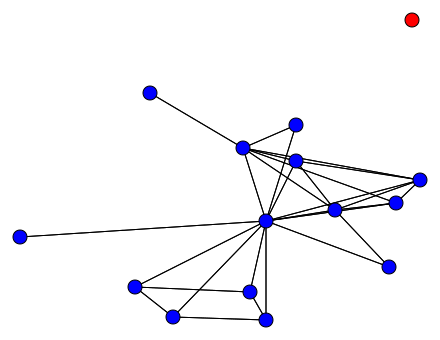

In [7]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

## Directed graphs

In [8]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [9]:
# weak connected components
labels = get_connected_components(adjacency)

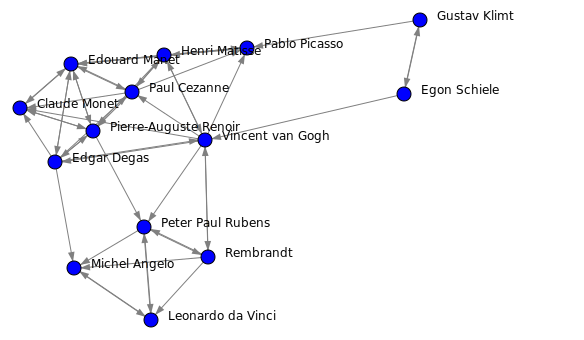

In [10]:
image = svg_digraph(adjacency, position=position, names=names, labels=labels)
SVG(image)

In [11]:
# strong connected components
labels = get_connected_components(adjacency, connection='strong')

/Users/thomas/Documents/github/scikit-network/sknetwork/visualization/graphs.py:93: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if name_position == 'left':
/Users/thomas/Documents/github/scikit-network/sknetwork/visualization/graphs.py:98: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif name_position == 'right':
/Users/thomas/Documents/github/scikit-network/sknetwork/visualization/graphs.py:109: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if name_position == 'above':
/Users/thomas/Documents/github/scikit-network/sknetwork/visualization/graphs.py:340: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if position == 'left':
/Users/thomas/Documents/github/scikit-n

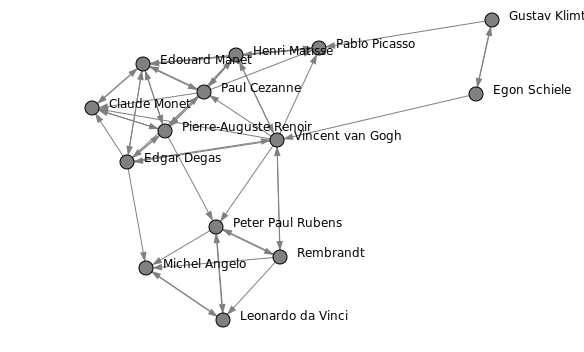

In [12]:
image = svg_digraph(adjacency, position, names, labels)
SVG(image)

## Bipartite graphs

In [13]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [14]:
# subgraph
k = 5
biadjacency = biadjacency[k:]
names_row = names_row[k:]

In [15]:
adjacency = bipartite2undirected(biadjacency)
labels = get_connected_components(adjacency)

In [16]:
n_row, _ = biadjacency.shape
labels_row = labels[:n_row]
labels_col = labels[n_row:]

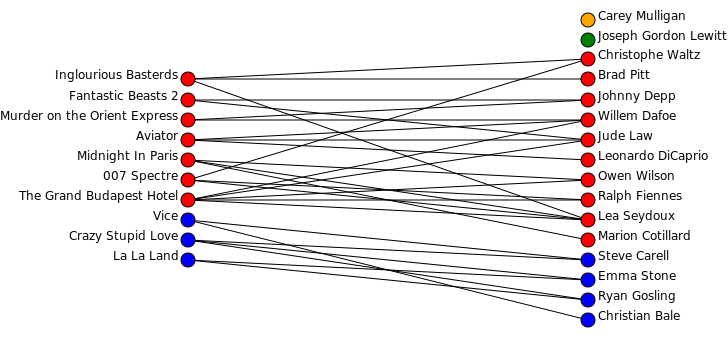

In [17]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row, labels_col)
SVG(image)